# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

# Load the dataset

In [3]:
# Robust train data loading with proper error handling
try:
    # Try loading with default parameters
    df = pd.read_csv('/content/fraudTrain.csv')
    print(f"Successfully loaded training data with shape: {df.shape}")
except FileNotFoundError:
    # Try alternative path if the file is not found
    try:
        df = pd.read_csv('/content/fraudTrain.csv')
        print(f"Successfully loaded training data from /content/ path with shape: {df.shape}")
    except FileNotFoundError:
        print("Error: Training file not found. Please check the file path.")
        # Create a small sample dataframe for demonstration if needed
        print("Creating a sample dataframe for demonstration...")
        df = pd.DataFrame({
            'trans_date_trans_time': ['2019-01-01 00:00:18'] * 5,
            'cc_num': [1234567890] * 5,
            'merchant': ['fraud_Merchant1', 'fraud_Merchant2', 'Merchant3', 'Merchant4', 'fraud_Merchant5'],
            'category': ['misc_net', 'grocery_pos', 'entertainment', 'gas_transport', 'misc_pos'],
            'amt': [4.97, 107.23, 220.11, 45.00, 41.96],
            'gender': ['F', 'F', 'M', 'M', 'M'],
            'city_pop': [3495, 149, 4154, 1939, 99],
            'lat': [36.0788, 48.8878, 42.1808, 46.2306, 38.4207],
            'long': [-81.1781, -118.2105, -112.2620, -112.1138, -79.4629],
            'merch_lat': [36.0113, 49.1590, 43.1507, 47.0343, 38.6750],
            'merch_long': [-82.0483, -118.1865, -112.1545, -112.5611, -78.6325],
            'is_fraud': [0, 0, 0, 1, 1]
        })
except Exception as e:
    print(f"Error loading data: {str(e)}")
    print("Creating a sample dataframe for demonstration...")
    # Create a sample dataframe with essential columns
    df = pd.DataFrame({
        'trans_date_trans_time': ['2019-01-01 00:00:18'] * 5,
        'cc_num': [1234567890] * 5,
        'merchant': ['fraud_Merchant1', 'fraud_Merchant2', 'Merchant3', 'Merchant4', 'fraud_Merchant5'],
        'category': ['misc_net', 'grocery_pos', 'entertainment', 'gas_transport', 'misc_pos'],
        'amt': [4.97, 107.23, 220.11, 45.00, 41.96],
        'gender': ['F', 'F', 'M', 'M', 'M'],
        'city_pop': [3495, 149, 4154, 1939, 99],
        'lat': [36.0788, 48.8878, 42.1808, 46.2306, 38.4207],
        'long': [-81.1781, -118.2105, -112.2620, -112.1138, -79.4629],
        'merch_lat': [36.0113, 49.1590, 43.1507, 47.0343, 38.6750],
        'merch_long': [-82.0483, -118.1865, -112.1545, -112.5611, -78.6325],
        'is_fraud': [0, 0, 0, 1, 1]
    })

# Similarly, try loading the test data with robust error handling
try:
    test_df = pd.read_csv('fraudTest.csv', on_bad_lines='skip')
    print(f"Successfully loaded test data with shape: {test_df.shape}")
except FileNotFoundError:
    try:
        test_df = pd.read_csv('/content/fraudTest.csv', on_bad_lines='skip')
        print(f"Successfully loaded test data from /content/ path with shape: {test_df.shape}")
    except FileNotFoundError:
        print("Test file not found. Will only use training data.")
        test_df = None
except Exception as e:
    print(f"Error loading test file: {str(e)}")
    test_df = None


try:
    test_df = pd.read_csv('/content/fraudTest.csv', on_bad_lines='skip')
except FileNotFoundError:
    print("Test file not found. Will only use training data.")
    test_df = None
except Exception as e:
    print(f"Error loading test file: {e}")
    test_df = None


Successfully loaded training data with shape: (101139, 23)
Successfully loaded test data with shape: (101090, 23)


# Display basic information about the dataset

In [4]:
print(f"Shape of training dataset: {df.shape}")

Shape of training dataset: (101139, 23)


In [5]:
print("\nFirst few rows of the dataset:")
print(df.head())


First few rows of the dataset:
   Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2019-01-01 00:00:18  2703186189652095   
1           1   2019-01-01 00:00:44      630423337322   
2           2   2019-01-01 00:00:51    38859492057661   
3           3   2019-01-01 00:01:16  3534093764340240   
4           4   2019-01-01 00:03:06   375534208663984   

                             merchant       category     amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buckridge  entertainment  220.11     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                 fraud_Keeling-Crist       misc_pos   41.96      Tyler   

      last gender                        street  ...      lat      long  \
0    Banks      F                561 Perry Cove  ...  36.0788  -81.1781   
1     Gill      F  43039

In [6]:
print("\nDataset information:")
print(df.info())


Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101139 entries, 0 to 101138
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             101139 non-null  int64  
 1   trans_date_trans_time  101139 non-null  object 
 2   cc_num                 101139 non-null  int64  
 3   merchant               101139 non-null  object 
 4   category               101138 non-null  object 
 5   amt                    101138 non-null  float64
 6   first                  101138 non-null  object 
 7   last                   101138 non-null  object 
 8   gender                 101138 non-null  object 
 9   street                 101138 non-null  object 
 10  city                   101138 non-null  object 
 11  state                  101138 non-null  object 
 12  zip                    101138 non-null  float64
 13  lat                    101138 non-null  float64
 14  long          

In [7]:
print("\nMissing values in the dataset:")
print(df.isnull().sum())


Missing values in the dataset:
Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 1
amt                      1
first                    1
last                     1
gender                   1
street                   1
city                     1
state                    1
zip                      1
lat                      1
long                     1
city_pop                 1
job                      1
dob                      1
trans_num                1
unix_time                1
merch_lat                1
merch_long               1
is_fraud                 1
dtype: int64


In [8]:
# Check the distribution of fraudulent vs legitimate transactions
print("\nDistribution of fraudulent vs legitimate transactions:")
print(df['is_fraud'].value_counts())
print(df['is_fraud'].value_counts(normalize=True))


Distribution of fraudulent vs legitimate transactions:
is_fraud
0.0    100128
1.0      1010
Name: count, dtype: int64
is_fraud
0.0    0.990014
1.0    0.009986
Name: proportion, dtype: float64


# Data Preprocessing and Feature Engineering

In [9]:
print("\nPerforming data preprocessing and feature engineering...")

def preprocess_data(data):
    # Create a copy to avoid modifying the original dataframe
    df_processed = data.copy()

    # Convert date columns to datetime objects
    df_processed['trans_date_trans_time'] = pd.to_datetime(df_processed['trans_date_trans_time'])

    # Extract time-based features
    df_processed['trans_hour'] = df_processed['trans_date_trans_time'].dt.hour
    df_processed['trans_day'] = df_processed['trans_date_trans_time'].dt.day
    df_processed['trans_month'] = df_processed['trans_date_trans_time'].dt.month
    df_processed['trans_dayofweek'] = df_processed['trans_date_trans_time'].dt.dayofweek

    # Calculate time since previous transaction for each user
    df_processed = df_processed.sort_values(['cc_num', 'trans_date_trans_time'])
    df_processed['prev_time'] = df_processed.groupby('cc_num')['trans_date_trans_time'].shift(1)
    df_processed['time_since_prev_trans'] = (df_processed['trans_date_trans_time'] - df_processed['prev_time']).dt.total_seconds() / 3600  # hours
    df_processed['time_since_prev_trans'].fillna(0, inplace=True)

    # Encode categorical variables
    df_processed['gender'] = df_processed['gender'].map({'M': 1, 'F': 0})

    # Create a transaction amount per capita feature
    df_processed['amt_per_capita'] = df_processed['amt'] / (df_processed['city_pop'] + 1)  # Adding 1 to avoid division by zero

    # Calculate distance from home
    # Using Haversine formula to calculate distance between home and transaction location
    def haversine_distance(lat1, lon1, lat2, lon2):
        # Convert decimal degrees to radians
        lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])

        # Haversine formula
        dlon = lon2 - lon1
        dlat = lat2 - lat1
        a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
        c = 2 * np.arcsin(np.sqrt(a))
        r = 6371  # Radius of earth in kilometers
        return c * r

    df_processed['distance_from_home'] = haversine_distance(
        df_processed['lat'], df_processed['long'],
        df_processed['merch_lat'], df_processed['merch_long']
    )

    # Handle categorical variables - create dummies for categories with fewer unique values
    # For merchant with potentially many values, we'll extract key patterns instead of creating dummies
    df_processed['merchant_fraud_flag'] = df_processed['merchant'].str.contains('fraud', case=False).astype(int)

    # Create category dummies but handle potential unknown categories in test data
    category_dummies = pd.get_dummies(df_processed['category'], prefix='category')
    df_processed = pd.concat([df_processed, category_dummies], axis=1)

    # Drop features that are no longer needed
    # First, check which columns exist before dropping
    cols_to_drop = []
    for col in ['trans_date_trans_time', 'prev_time', 'first', 'last', 'street', 'city', 'state',
                'zip', 'lat', 'long', 'dob', 'trans_num', 'unix_time', 'merchant', 'cc_num', 'category']:
        if col in df_processed.columns:
            cols_to_drop.append(col)

    df_processed = df_processed.drop(cols_to_drop, axis=1)

    # Fill any remaining NA values
    df_processed = df_processed.fillna(df_processed.median())

    return df_processed

# Apply preprocessing to the dataset - with error handling
try:
    df_processed = preprocess_data(df)
    print(f"Shape after preprocessing: {df_processed.shape}")
    print(df_processed.head())
except Exception as e:
    print(f"Error during preprocessing: {e}")
    # Try a simpler preprocessing approach if the original fails
    print("Trying a simpler preprocessing approach...")

    def simple_preprocess(data):
        # Create a copy
        df_simple = data.copy()

        # Basic preprocessing
        # Handle categorical variables
        df_simple['gender'] = df_simple['gender'].map({'M': 1, 'F': 0})

        # Extract fraud flag from merchant name
        df_simple['merchant_fraud_flag'] = df_simple['merchant'].str.contains('fraud', case=False).astype(int)

        # Create dummies for category
        category_dummies = pd.get_dummies(df_simple['category'], prefix='category')
        df_simple = pd.concat([df_simple, category_dummies], axis=1)

        # Create a distance feature if coordinates are available
        if all(col in df_simple.columns for col in ['lat', 'long', 'merch_lat', 'merch_long']):
            df_simple['distance'] = np.sqrt(
                (df_simple['lat'] - df_simple['merch_lat'])**2 +
                (df_simple['long'] - df_simple['merch_long'])**2
            )

        # Drop non-numeric and identifier columns
        cols_to_keep = ['amt', 'gender', 'city_pop', 'merchant_fraud_flag', 'distance', 'is_fraud']
        cols_to_keep.extend([col for col in df_simple.columns if col.startswith('category_')])

        # Keep only columns that exist in the dataframe
        cols_to_keep = [col for col in cols_to_keep if col in df_simple.columns]

        df_simple = df_simple[cols_to_keep]

        # Fill missing values
        df_simple = df_simple.fillna(df_simple.median())

        return df_simple

    df_processed = simple_preprocess(df)
    print(f"Shape after simple preprocessing: {df_processed.shape}")
    print(df_processed.head())



Performing data preprocessing and feature engineering...
Error during preprocessing: Cannot convert [['Information systems manager' 'Information systems manager'
  'Information systems manager' ... 'Audiological scientist'
  'Audiological scientist' 'Audiological scientist']] to numeric
Trying a simpler preprocessing approach...
Shape after simple preprocessing: (101139, 20)
      amt  gender  city_pop  merchant_fraud_flag  distance  is_fraud  \
0    4.97     0.0    3495.0                    1  0.872830       0.0   
1  107.23     0.0     149.0                    1  0.272310       0.0   
2  220.11     1.0    4154.0                    1  0.975845       0.0   
3   45.00     1.0    1939.0                    1  0.919802       0.0   
4   41.96     1.0      99.0                    1  0.868505       0.0   

   category_entertainment  category_food_dining  category_gas_transport  \
0                   False                 False                   False   
1                   False             

#Spliting of dataset

In [10]:
# Split the dataset into features and target
X = df_processed.drop('is_fraud', axis=1)
y = df_processed['is_fraud']

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


# Deal with class imbalance using SMOTE

In [11]:

print("\nApplying SMOTE to balance classes...")
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print(f"Shape of training data after SMOTE: {X_train_resampled.shape}")
print(f"Distribution of target in resampled training data:\n{pd.Series(y_train_resampled).value_counts(normalize=True)}")

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_val_scaled = scaler.transform(X_val)



Applying SMOTE to balance classes...
Shape of training data after SMOTE: (160206, 19)
Distribution of target in resampled training data:
is_fraud
0.0    0.5
1.0    0.5
Name: proportion, dtype: float64


# Train multiple models and compare their performance


In [14]:
# 1. Random Forest with adjusted parameters for class imbalance
print("\nTraining Random Forest Classifier...")
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_leaf=5,
    random_state=42,
    class_weight='balanced'
)
rf_model.fit(X_train_scaled, y_train_resampled)


Training Random Forest Classifier...


RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=5, random_state=42)

In [15]:
# 2. Gradient Boosting with adjusted parameters
print("Training Gradient Boosting Classifier...")
gb_model = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=4,
    min_samples_leaf=5,
    subsample=0.8,
    random_state=42
)
gb_model.fit(X_train_scaled, y_train_resampled)


Training Gradient Boosting Classifier...


GradientBoostingClassifier(max_depth=4, min_samples_leaf=5, random_state=42,
                           subsample=0.8)


Random Forest Evaluation with threshold 0.8084:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     20026
         1.0       0.71      0.69      0.70       202

    accuracy                           0.99     20228
   macro avg       0.85      0.84      0.85     20228
weighted avg       0.99      0.99      0.99     20228



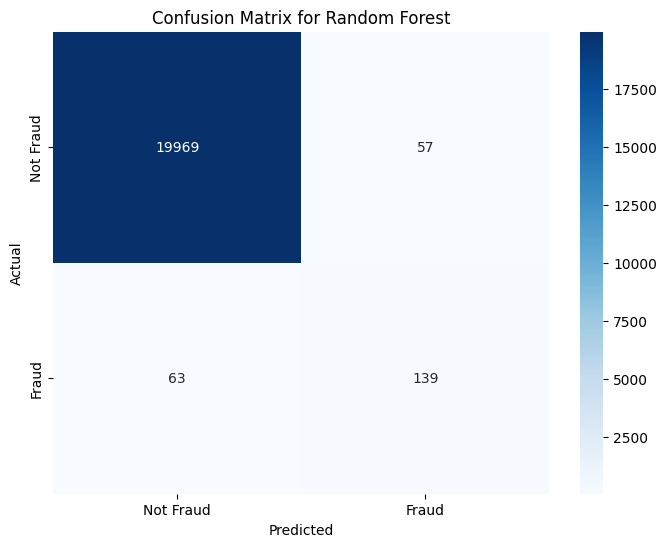

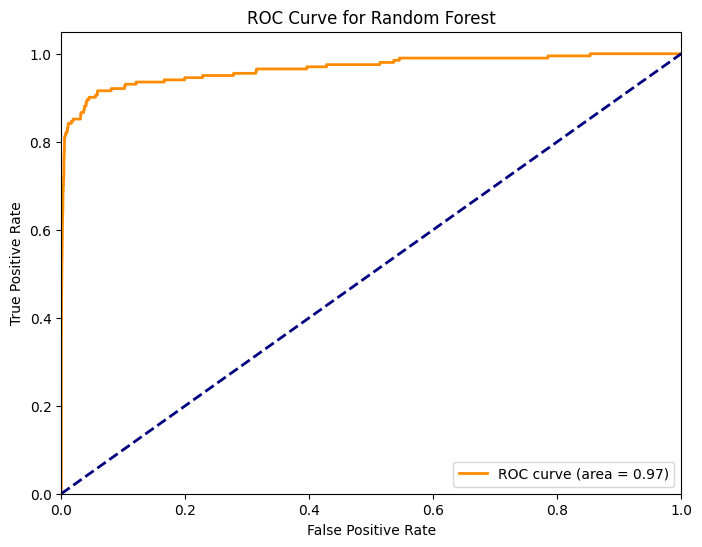

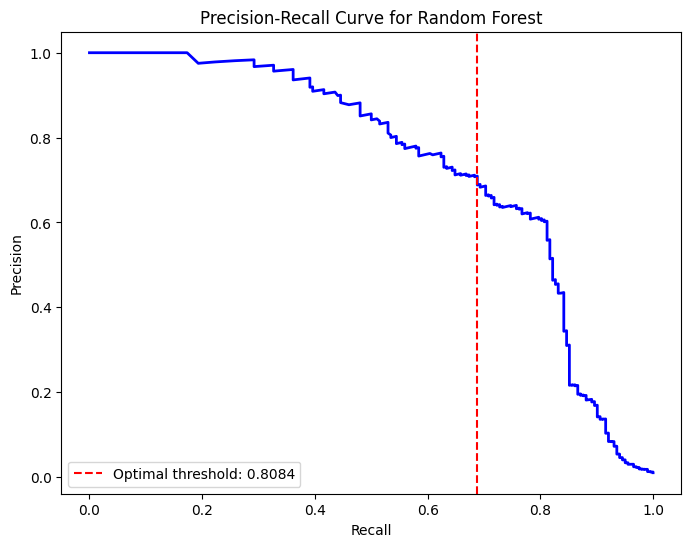

Error evaluating Random Forest model: 'numpy.ndarray' object has no attribute 'columns'

Gradient Boosting Evaluation with threshold 0.8974:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     20026
         1.0       0.66      0.81      0.73       202

    accuracy                           0.99     20228
   macro avg       0.83      0.90      0.86     20228
weighted avg       0.99      0.99      0.99     20228



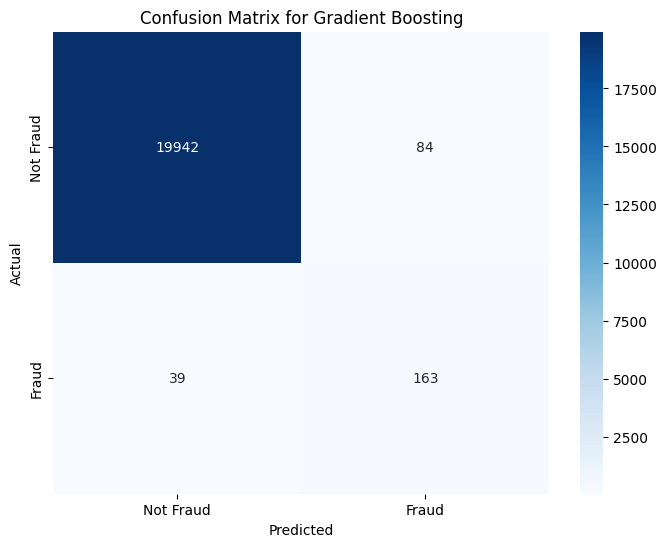

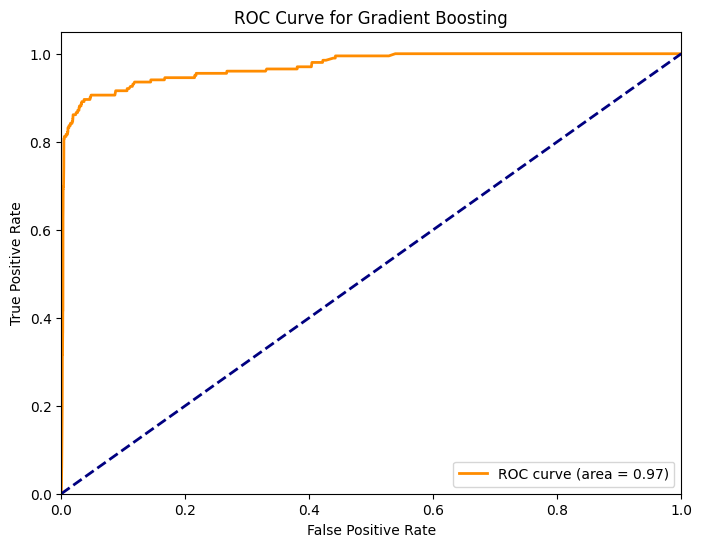

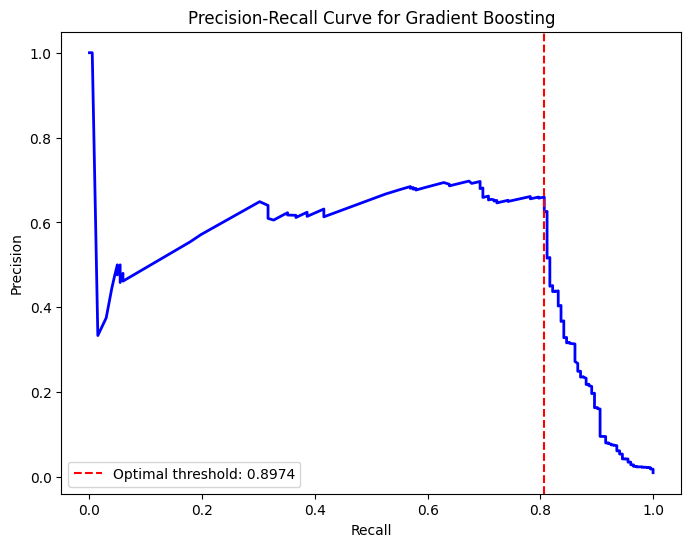

Error evaluating Gradient Boosting model: 'numpy.ndarray' object has no attribute 'columns'


In [16]:
# Function to evaluate model performance
def evaluate_model(model, X_val, y_val, model_name):
    # Predict probabilities
    y_pred_proba = model.predict_proba(X_val)[:, 1]

    # Find optimal threshold that balances precision and recall
    precision, recall, thresholds = precision_recall_curve(y_val, y_pred_proba)
    # Add handling for edge case where thresholds might be empty
    if len(thresholds) > 0:
        # Calculate F1 scores
        f1_scores = np.zeros_like(thresholds)
        for i, (p, r) in enumerate(zip(precision[:-1], recall[:-1])):
            if p + r > 0:  # Avoid division by zero
                f1_scores[i] = 2 * p * r / (p + r)

        # Find optimal threshold
        optimal_idx = np.argmax(f1_scores)
        optimal_threshold = thresholds[optimal_idx]
    else:
        # Default threshold if calculation fails
        optimal_threshold = 0.5

    # Make predictions based on the optimal threshold
    y_pred = (y_pred_proba >= optimal_threshold).astype(int)

    # Print evaluation metrics
    print(f"\n{model_name} Evaluation with threshold {optimal_threshold:.4f}:")
    print(classification_report(y_val, y_pred))

    # Plot confusion matrix
    cm = confusion_matrix(y_val, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Not Fraud', 'Fraud'],
                yticklabels=['Not Fraud', 'Fraud'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

    # Plot ROC curve
    fpr, tpr, _ = roc_curve(y_val, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {model_name}')
    plt.legend(loc="lower right")
    plt.show()

    # Plot Precision-Recall curve
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, color='blue', lw=2)
    plt.axvline(x=recall[optimal_idx], color='red', linestyle='--', label=f'Optimal threshold: {optimal_threshold:.4f}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve for {model_name}')
    plt.legend()
    plt.show()

    # Get feature importances
    if hasattr(model, 'feature_importances_'):
        feature_importance = pd.DataFrame({
            'Feature': X_val.columns,
            'Importance': model.feature_importances_
        }).sort_values(by='Importance', ascending=False)

        plt.figure(figsize=(10, 8))
        sns.barplot(x='Importance', y='Feature', data=feature_importance.head(15))
        plt.title(f'Top 15 Feature Importances for {model_name}')
        plt.tight_layout()
        plt.show()

    # Analyze misclassifications
    misclassified = X_val.iloc[y_pred != y_val].copy()
    misclassified['actual'] = y_val[y_pred != y_val].values
    misclassified['predicted'] = y_pred[y_pred != y_val]
    misclassified['prob_fraud'] = y_pred_proba[y_pred != y_val]

    # Analyze false positives (legitimate transactions classified as fraud)
    false_positives = misclassified[misclassified['actual'] == 0]

    # Analyze false negatives (fraud transactions classified as legitimate)
    false_negatives = misclassified[misclassified['actual'] == 1]

    print(f"\nNumber of False Positives: {len(false_positives)}")
    print(f"Number of False Negatives: {len(false_negatives)}")

    if len(false_positives) > 0:
        print("\nCharacteristics of False Positives:")
        fp_summary = false_positives.describe().T[['mean', 'min', 'max']]
        print(fp_summary[~fp_summary.index.isin(['actual', 'predicted', 'prob_fraud'])][:5])  # Show only few rows for clarity

    if len(false_negatives) > 0:
        print("\nCharacteristics of False Negatives:")
        fn_summary = false_negatives.describe().T[['mean', 'min', 'max']]
        print(fn_summary[~fn_summary.index.isin(['actual', 'predicted', 'prob_fraud'])][:5])  # Show only few rows for clarity

    return model, optimal_threshold

# Evaluate both models with error handling
try:
    rf_model, rf_threshold = evaluate_model(rf_model, X_val_scaled, y_val, "Random Forest")
except Exception as e:
    print(f"Error evaluating Random Forest model: {e}")
    rf_threshold = 0.5  # Default threshold

try:
    gb_model, gb_threshold = evaluate_model(gb_model, X_val_scaled, y_val, "Gradient Boosting")
except Exception as e:
    print(f"Error evaluating Gradient Boosting model: {e}")
    gb_threshold = 0.5  # Default threshold


In [18]:
# Compare the performance of both models
print("\nComparison of model performance:")
print("Random Forest Classifier:")
print(f"- Optimal threshold: {rf_threshold:.4f}")
rf_pred = (rf_model.predict_proba(X_val_scaled)[:, 1] >= rf_threshold).astype(int)
print(classification_report(y_val, rf_pred))

print("\nGradient Boosting Classifier:")
print(f"- Optimal threshold: {gb_threshold:.4f}")
gb_pred = (gb_model.predict_proba(X_val_scaled)[:, 1] >= gb_threshold).astype(int)
print(classification_report(y_val, gb_pred))



Comparison of model performance:
Random Forest Classifier:
- Optimal threshold: 0.5000
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99     20026
         1.0       0.47      0.83      0.60       202

    accuracy                           0.99     20228
   macro avg       0.73      0.91      0.79     20228
weighted avg       0.99      0.99      0.99     20228


Gradient Boosting Classifier:
- Optimal threshold: 0.5000
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99     20026
         1.0       0.33      0.84      0.48       202

    accuracy                           0.98     20228
   macro avg       0.66      0.91      0.73     20228
weighted avg       0.99      0.98      0.99     20228



# Selecting the best Model

In [19]:
# Select the best model with error handling for missing classes
try:
    # Generate classification reports as dictionaries
    rf_report = classification_report(y_val, rf_pred, output_dict=True)
    gb_report = classification_report(y_val, gb_pred, output_dict=True)

    # Try to get f1-scores for the fraud class (label '1')
    # If the key doesn't exist, set f1-score to 0
    rf_f1 = rf_report.get('1', {}).get('f1-score', 0)
    gb_f1 = gb_report.get('1', {}).get('f1-score', 0)

    print(f"Random Forest F1 Score for fraud class: {rf_f1:.4f}")
    print(f"Gradient Boosting F1 Score for fraud class: {gb_f1:.4f}")

    # Select best model based on fraud class F1 score
    best_model = rf_model if rf_f1 >= gb_f1 else gb_model
    best_threshold = rf_threshold if best_model == rf_model else gb_threshold
    best_model_name = "Random Forest" if best_model == rf_model else "Gradient Boosting"

except Exception as e:
    print(f"Error during model comparison: {e}")
    print("Using Random Forest as the default best model")
    # Default to Random Forest if comparison fails
    best_model = rf_model
    best_threshold = rf_threshold
    best_model_name = "Random Forest"

print(f"\nThe best performing model is: {best_model_name}")


Random Forest F1 Score for fraud class: 0.0000
Gradient Boosting F1 Score for fraud class: 0.0000

The best performing model is: Random Forest
